<a href="https://colab.research.google.com/github/Rash-Anj/EmployeeClassification_Python/blob/main/EmployeeClassification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import skew
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset from Google Drive in Colab
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EmployeeClassification_MLP/Employee.csv')

# Chech the shape of the data
data.shape

(4653, 9)

In [ ]:
data.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [ ]:
#Check datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


# **Observation**


*   The categorical values are in the datatype 'object'
*   Better to convert them into the datatype 'category' in order to make the data processing more memory-efficient, faster, and easier to interpret.

In [ ]:
object_cols = data.select_dtypes(include=['object']).columns
data[object_cols] = data[object_cols].astype('category')

In [ ]:
# Check the unique values of the categorical columns
data["Education"].unique()

['Bachelors', 'Masters', 'PHD']
Categories (3, object): ['Bachelors', 'Masters', 'PHD']

In [ ]:
data["City"].unique()

['Bangalore', 'Pune', 'New Delhi']
Categories (3, object): ['Bangalore', 'New Delhi', 'Pune']

In [ ]:
data["Gender"].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [ ]:
data["EverBenched"].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [ ]:
# Describe the dataset
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# **Handling Missing Values**

In [ ]:
# check weather there's any null values in the dataset
data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# **Observation**


*  Looks like there are no NaN values in this dataset
*   Therefore, handling missing values is not needed for this dataset



# **Handling Outliers**


*   First let's use Box Plots to idetify visual outliers.



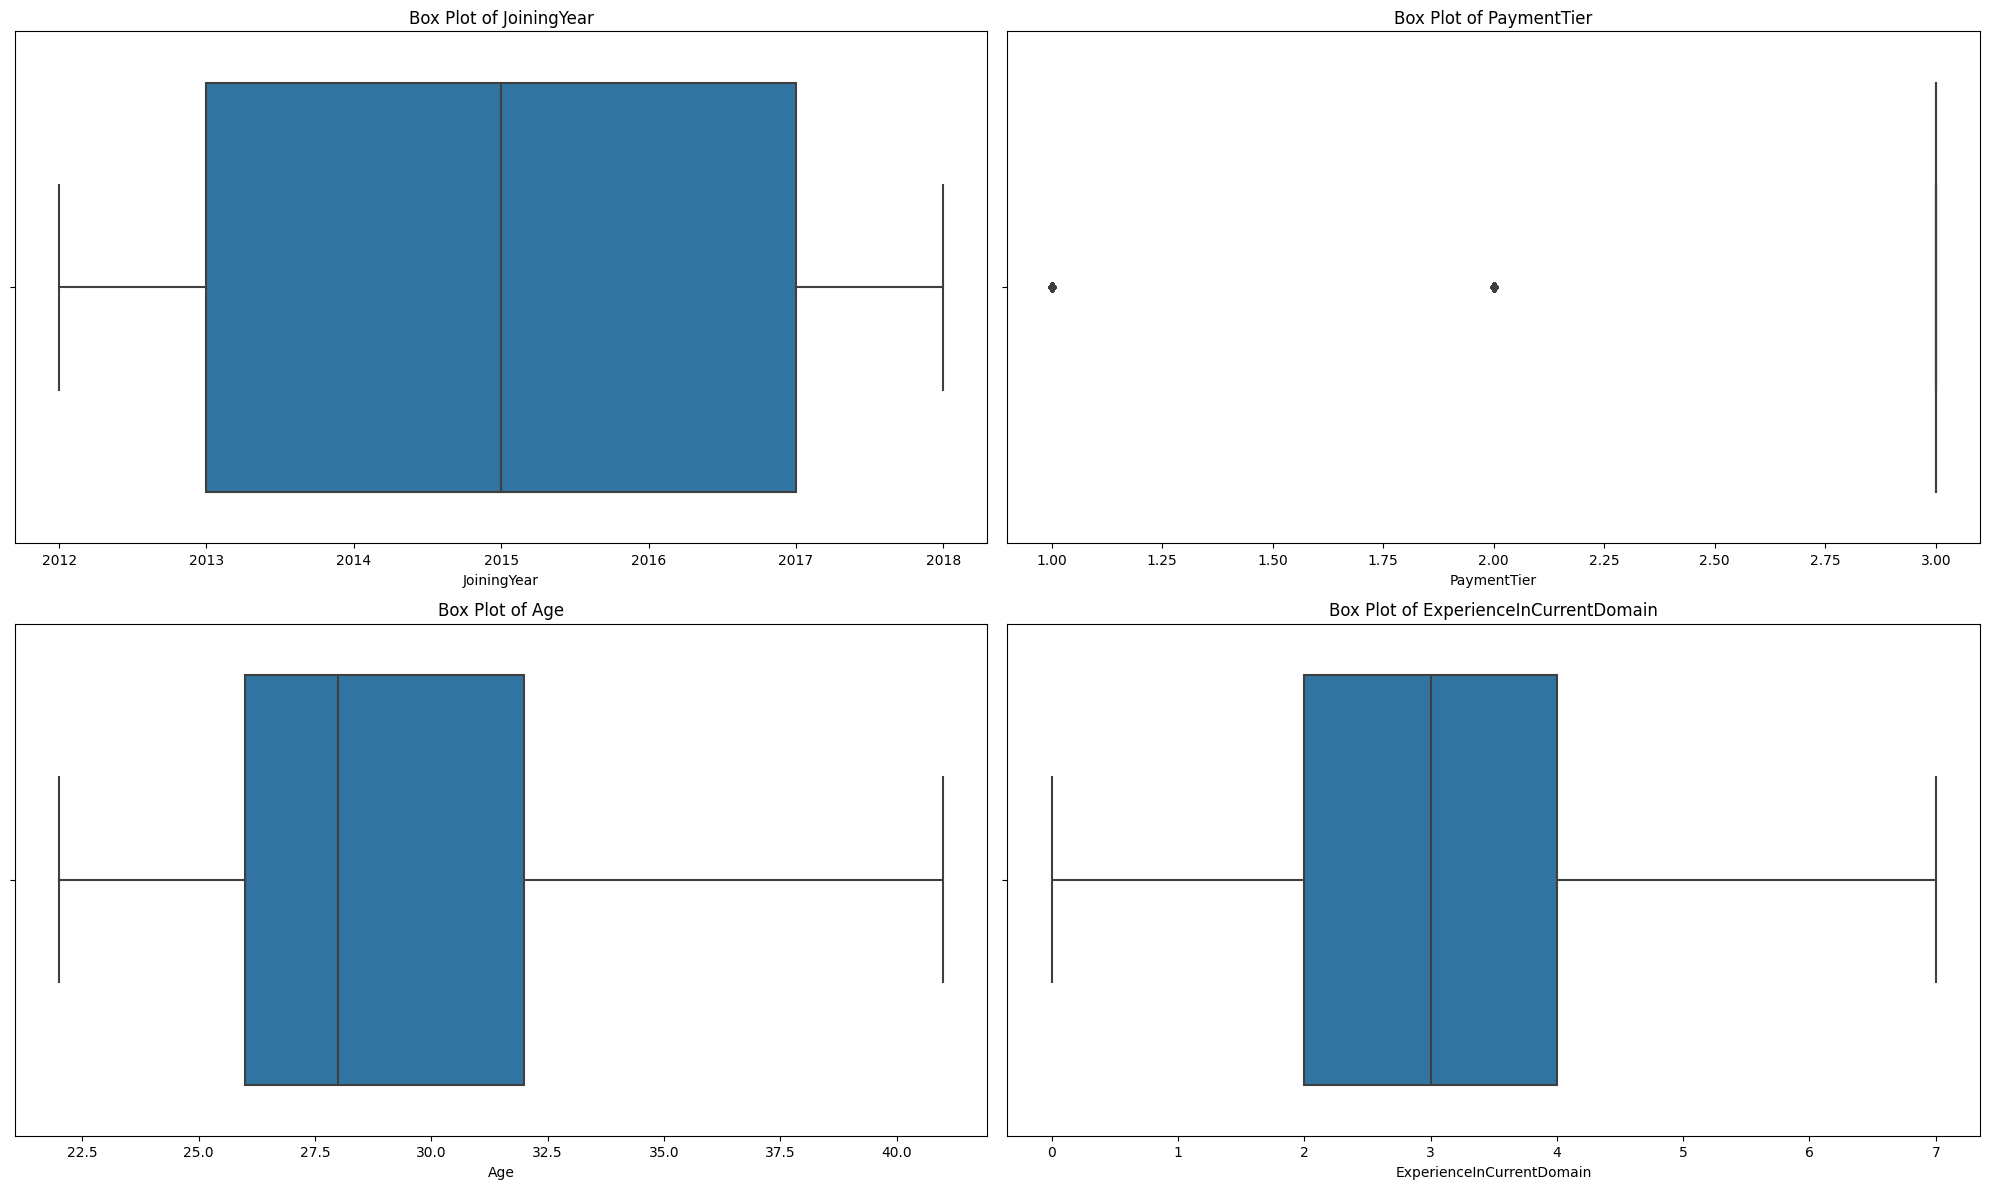

In [ ]:
numerical_columns = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']

plt.figure(figsize=(20, 12))

for i, feature in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
## Quantifing outliers using IQR method

quanti_var = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

outliers_count_iqr = data[quanti_var].apply(count_outliers)
outliers_count_iqr

JoiningYear                  0
Age                          0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# **Observation**


*   Looks like there are no outliers found.
*   Therefore, outlier handling is not needed in this case.



# **Distribution of the Target Variable**

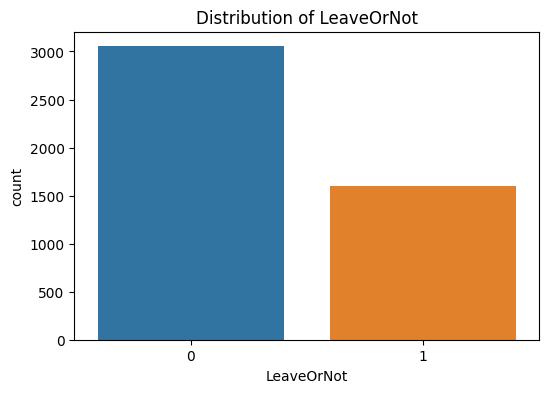

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='LeaveOrNot')
plt.title('Distribution of LeaveOrNot')
plt.show()

# **Observation**


*   Just a little more than one third of the employees are Leaving.
*   Classes are somewhat imbalanced



# **Histograms for the Numerical Features**

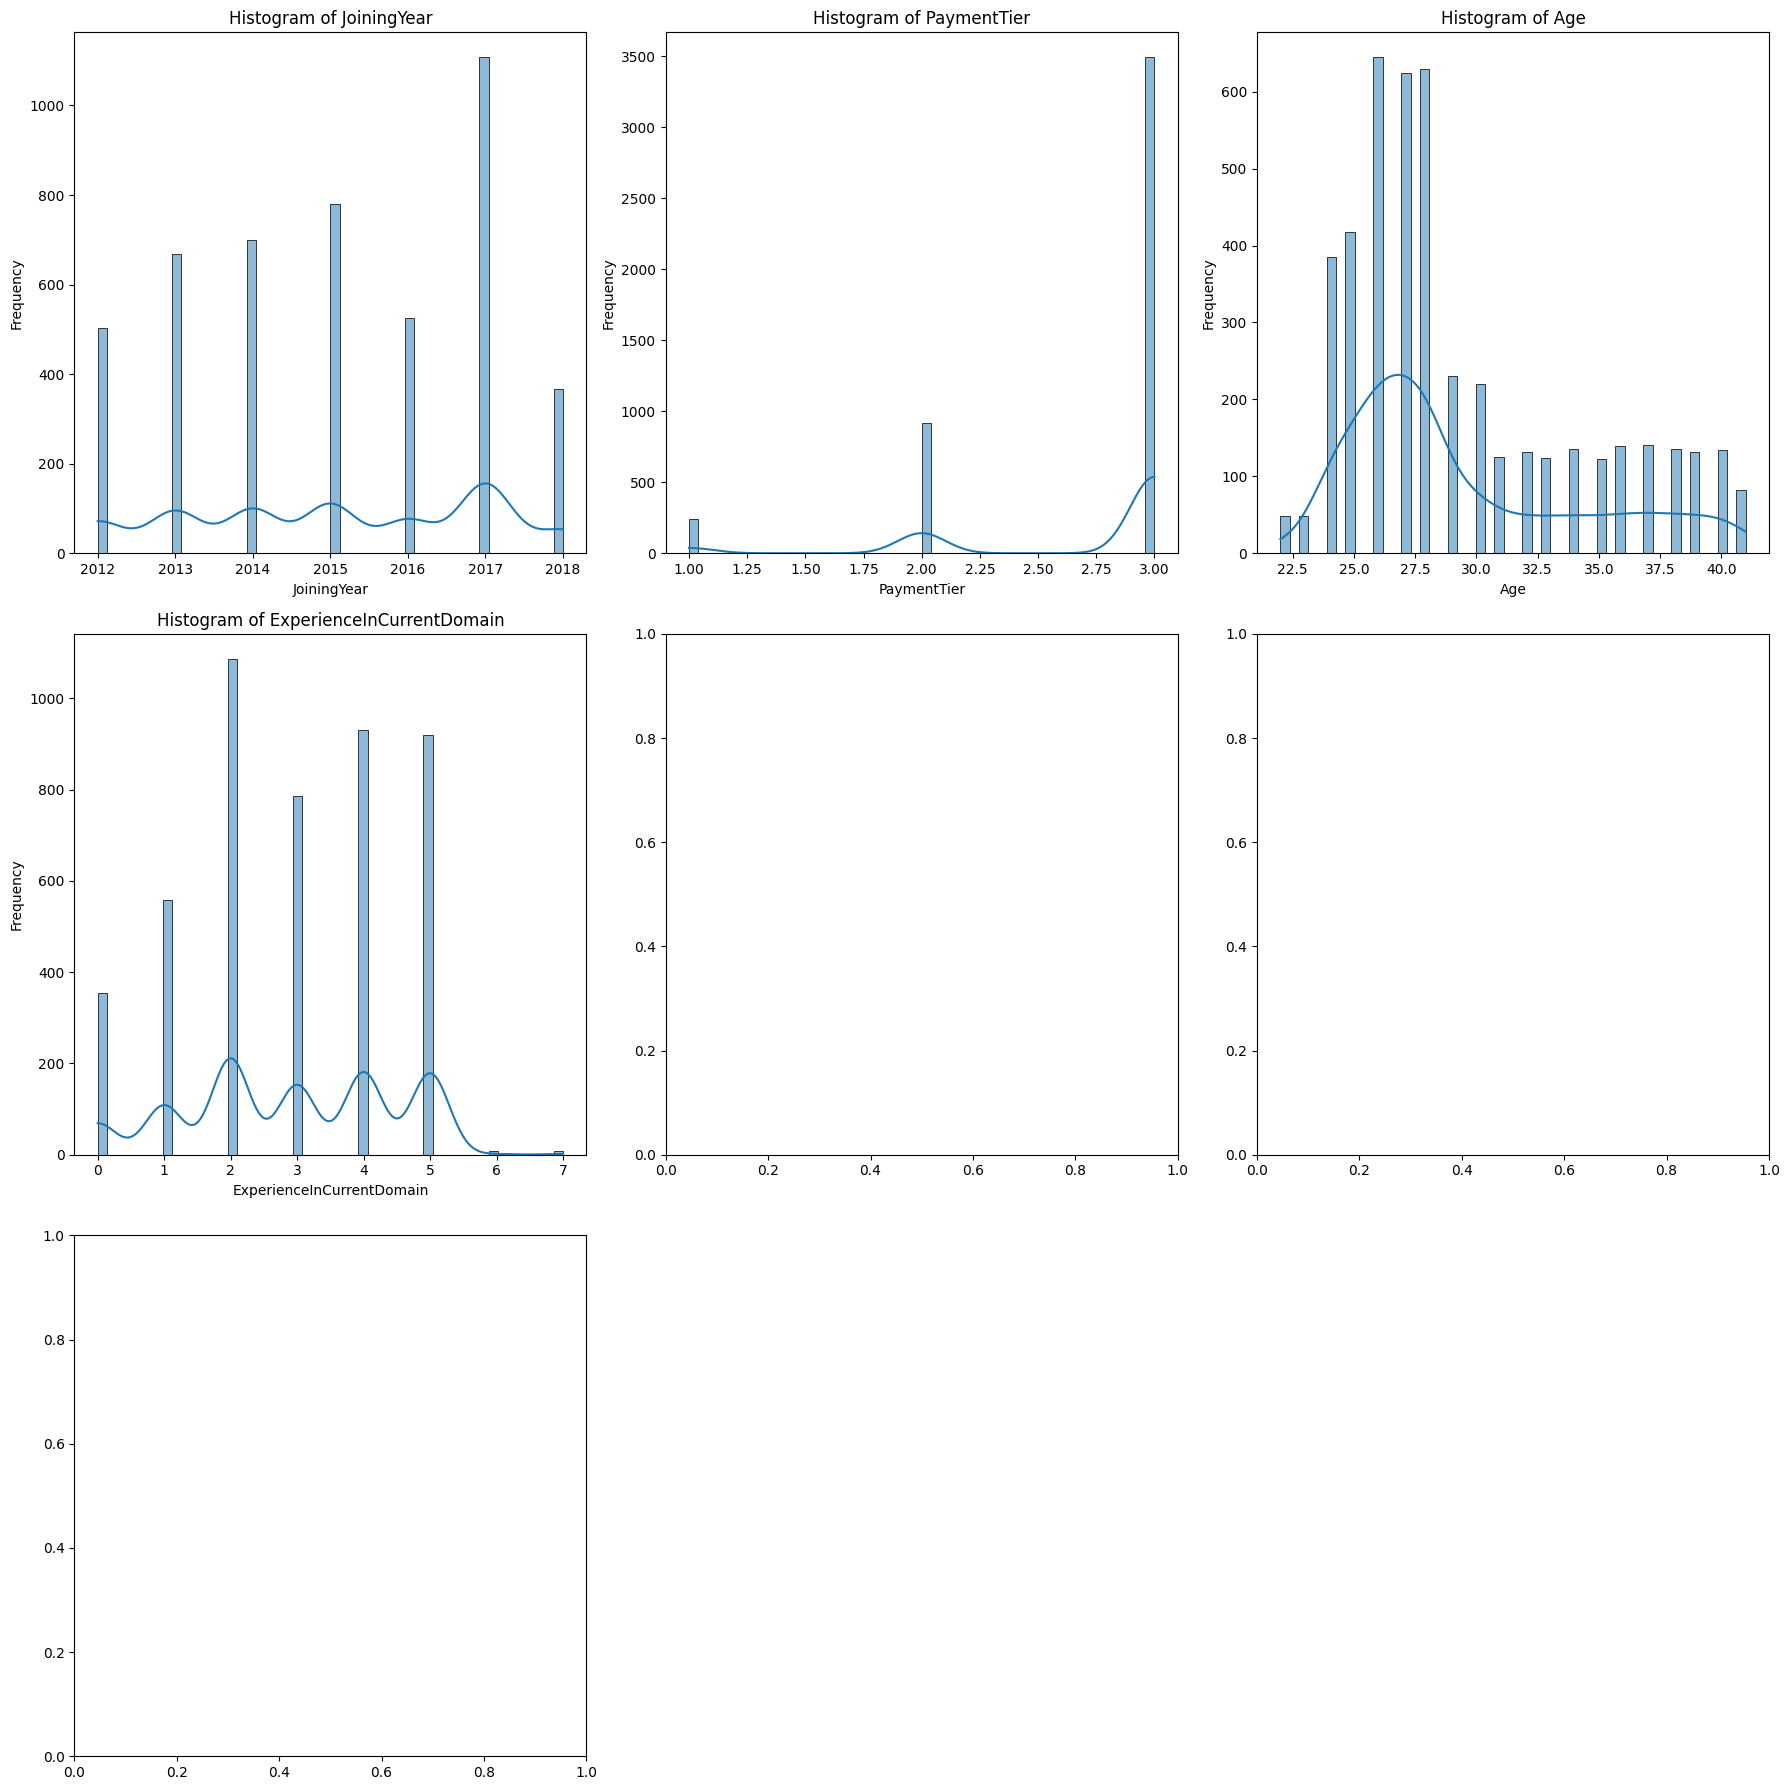

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

for i, var in enumerate(numerical_columns):
    row = i // 3
    col = i % 3
    sns.histplot(data[var], bins=50, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

axes[-1, -1].axis('off')
axes[-1, -2].axis('off')

plt.tight_layout()
plt.show()

# **Observation**


*  **JoiningYear** :  Even though the number of employees joined has been almost same in the previous years, after being Max in 2017, it drastically dropped to being Min in 2018. May be new vacancies in the company were less in that year. The reason might be  because Global trade spats, rising interest rates and Brexit uncertainty have helped most stock indices to their worst year in a decade in 2018.
*   **PamentTier** : Majority of the employees fall under paymentTier 3 followed by 1 while 2 has the minority.
*   **Age** : This distribution is slightly right skewed. Most of the employees are young.
*   **ExperienceInCurrentDomain** : The distribution is normal.





# **Transformation**

In [ ]:
# Applying Square Root Transformation on Age as it is useful for reducing the impact of outliers and handling right-skewed data.

feature_column_1 = 'Age'

# Apply square root transformation to the feature
data[feature_column_1] = data[feature_column_1].apply(lambda x: x**0.5)

# **Sub Plots for the Categorical Features**

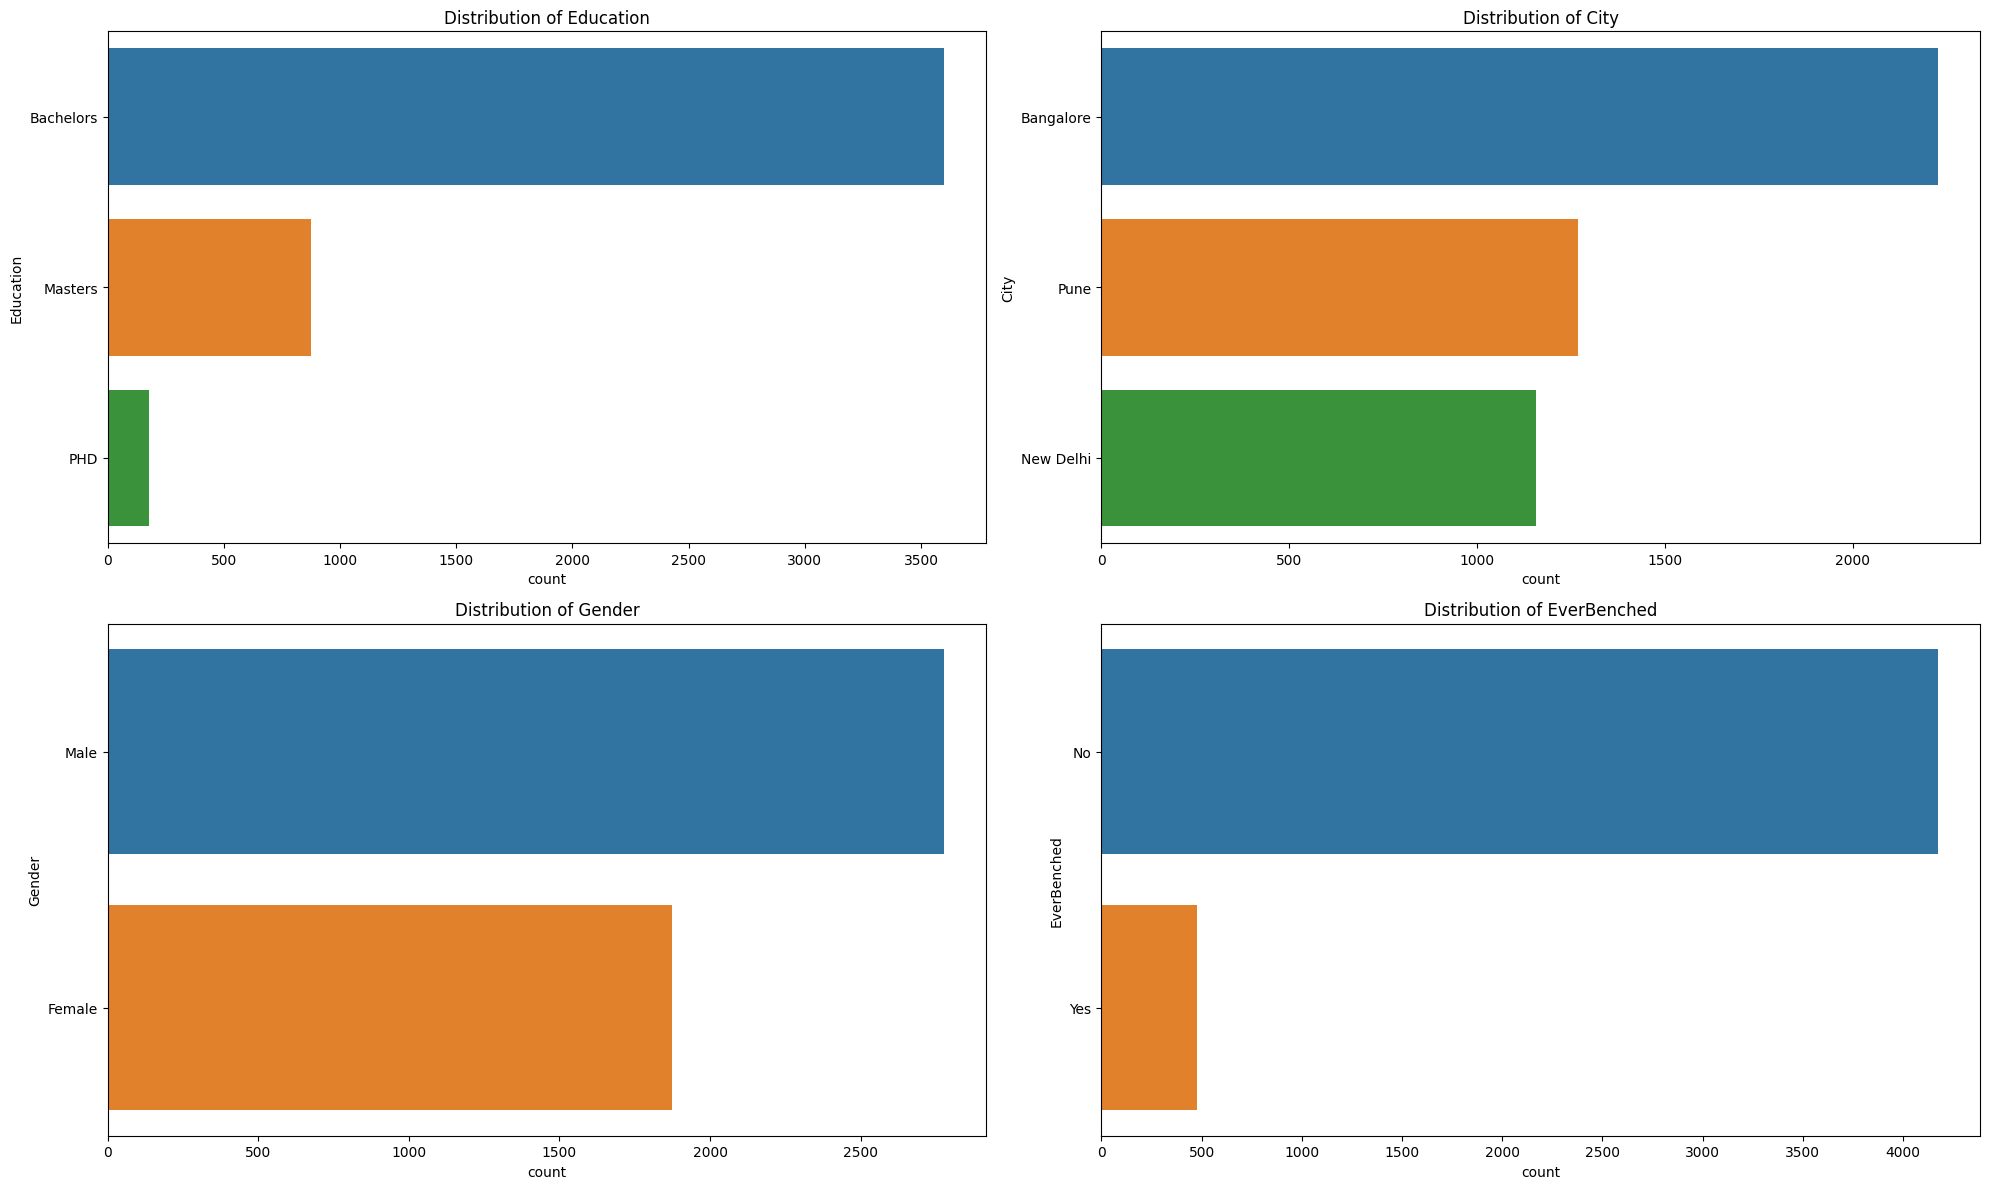

In [ ]:
categorical_columns = ['Education', 'City', 'Gender', 'EverBenched']


plt.figure(figsize=(20, 12))


for i, feature in enumerate(categorical_columns):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=data, y=feature, order = data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# **Observations**


*   **Education** : Majority of the employees have a bachelor's degree. This may be because of the correlation of Education with the Age.
*   **City** : Bangalore has the highest number of employees, followed by Pune and New Delhi.
*   **Gender** : Majority of the employees are Male.
*   **EverBenched** : The majority of employees have not been benched.





# **Correlations between the Features**

<ipython-input-19-564e886bc28a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


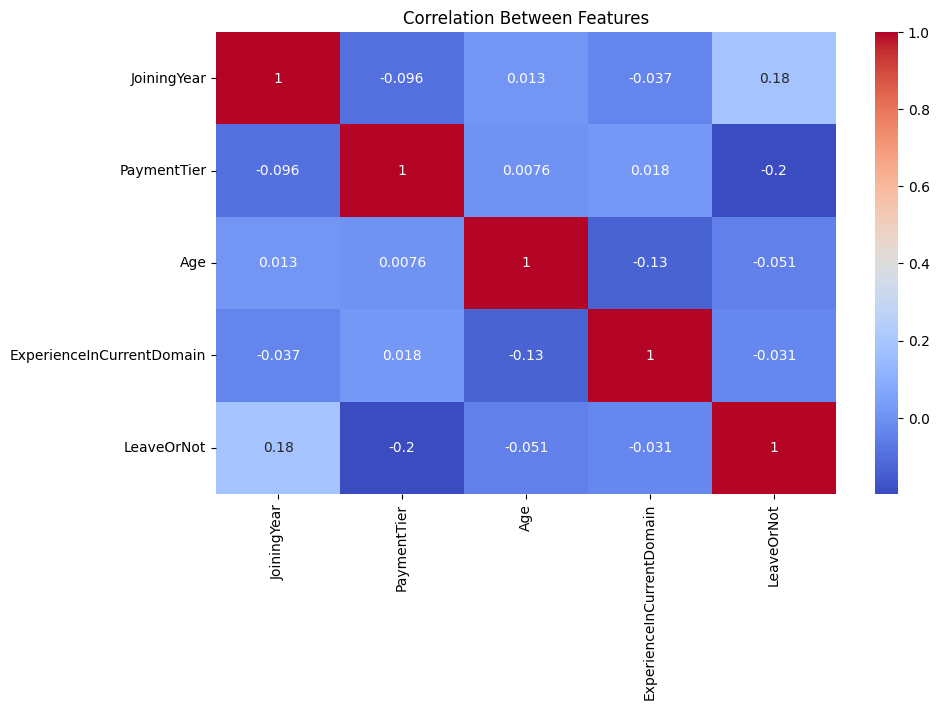

In [ ]:

correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

In [ ]:
correlation_matrix

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


# **Observations**
- Payment Tier is slightly negatively linked to LeaveOrNot, suggesting that individuals in higher payment tiers are less inclined to leave.
- There is a moderate positive connection between Age and ExperienceInCurrentDomain
- None of the features display a significant correlation with the target variable LeaveOrNot, suggesting that a linear model might not be the most suitable solution for this issue.



# **Encoding Categorical Features**

In [ ]:
data_encoded = pd.get_dummies(data, columns=['Education','City', 'Gender','EverBenched'])

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   JoiningYear                4653 non-null   int64  
 1   PaymentTier                4653 non-null   int64  
 2   Age                        4653 non-null   float64
 3   ExperienceInCurrentDomain  4653 non-null   int64  
 4   LeaveOrNot                 4653 non-null   int64  
 5   Education_Bachelors        4653 non-null   uint8  
 6   Education_Masters          4653 non-null   uint8  
 7   Education_PHD              4653 non-null   uint8  
 8   City_Bangalore             4653 non-null   uint8  
 9   City_New Delhi             4653 non-null   uint8  
 10  City_Pune                  4653 non-null   uint8  
 11  Gender_Female              4653 non-null   uint8  
 12  Gender_Male                4653 non-null   uint8  
 13  EverBenched_No             4653 non-null   uint8

In [ ]:
data_encoded.head(5)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,2.414736,0,0,1,0,0,1,0,0,0,1,1,0
1,2013,1,2.300327,3,1,1,0,0,0,0,1,1,0,1,0
2,2014,3,2.482824,2,0,1,0,0,0,1,0,1,0,1,0
3,2016,3,2.279507,5,1,0,1,0,1,0,0,0,1,1,0
4,2017,3,2.213364,2,1,0,1,0,0,0,1,0,1,0,1


# **Handling Class Imbalance**

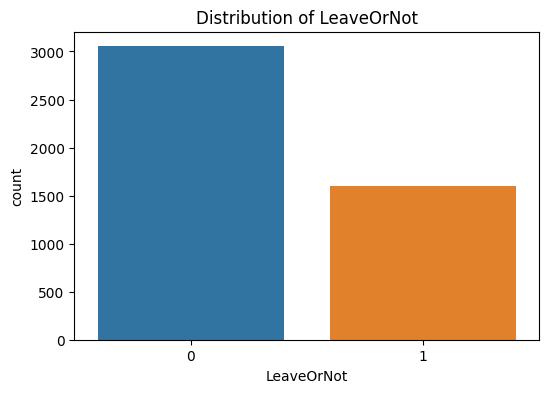

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='LeaveOrNot')
plt.title('Distribution of LeaveOrNot')
plt.show()

In [ ]:
value_counts = data["LeaveOrNot"].value_counts()
imbalance_ratio = value_counts[0] / value_counts[1]

value_counts,imbalance_ratio

(0    3053
 1    1600
 Name: LeaveOrNot, dtype: int64,
 1.908125)

# **Observation**
The imbalance ratio is about 1.91, which means that class 0 is almost twice as large as class 1.

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = data_encoded.drop(columns=['LeaveOrNot'])
y = data_encoded['LeaveOrNot']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)


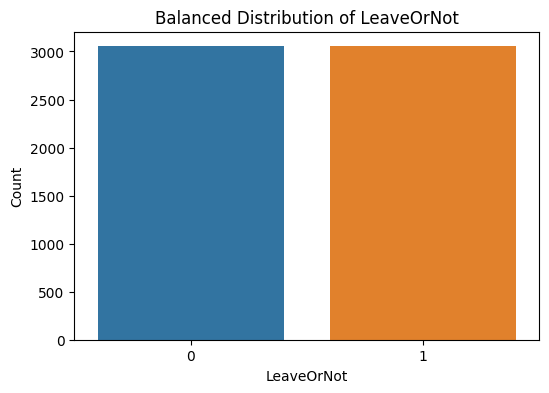

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)  # Set the color palette as needed
plt.xlabel('LeaveOrNot')
plt.ylabel('Count')
plt.title('Balanced Distribution of LeaveOrNot')
plt.show()

# **Split the data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled

array([[-1.10973993,  0.53942425,  0.18195088, ...,  0.81567419,
         0.33373122, -0.33373122],
       [-1.64567506,  0.53942425, -0.95186837, ...,  0.81567419,
         0.33373122, -0.33373122],
       [ 1.03400058, -1.22639551, -0.03280563, ...,  0.81567419,
         0.33373122, -0.33373122],
       ...,
       [ 0.49806545,  0.53942425,  1.90695969, ..., -1.2259797 ,
         0.33373122, -0.33373122],
       [-0.03786968,  0.53942425,  2.24880526, ...,  0.81567419,
         0.33373122, -0.33373122],
       [-0.03786968,  0.53942425, -0.47955944, ...,  0.81567419,
         0.33373122, -0.33373122]])

In [ ]:
# Build the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=[BinaryAccuracy()])


In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/100
117/117 [==============================] - 2s 14ms/step - loss: 0.3096 - binary_accuracy: 0.8718 - val_loss: 0.3301 - val_binary_accuracy: 0.8561
Epoch 2/100
117/117 [==============================] - 2s 16ms/step - loss: 0.3096 - binary_accuracy: 0.8675 - val_loss: 0.3437 - val_binary_accuracy: 0.8604
Epoch 3/100
117/117 [==============================] - 1s 11ms/step - loss: 0.3082 - binary_accuracy: 0.8716 - val_loss: 0.3387 - val_binary_accuracy: 0.8582
Epoch 4/100
117/117 [==============================] - 1s 6ms/step - loss: 0.3061 - binary_accuracy: 0.8700 - val_loss: 0.3386 - val_binary_accuracy: 0.8711
Epoch 5/100
117/117 [==============================] - 1s 9ms/step - loss: 0.3063 - binary_accuracy: 0.8708 - val_loss: 0.3353 - val_binary_accuracy: 0.8668
Epoch 6/100
117/117 [==============================] - 1s 7ms/step - loss: 0.3048 - binary_accuracy: 0.8659 - val_loss: 0.3362 - val_binary_accuracy: 0.8647
Epoch 7/100
117/117 [==============================] - 

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


30/30 [==============================] - 0s 3ms/step - loss: 0.3409 - binary_accuracy: 0.8711
Test Loss: 0.3409
Test Accuracy: 0.8711
